# Chapter 6 - Evolutionary Algorithms
### Deep Reinforcement Learning *in Action*

##### Listing 6.1

In [1]:
# 진화 알고리즘을 이용해 Hello World를 구하기 
import random
import numpy as np
from matplotlib import pyplot as plt

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " #A
target = "Hello World!" #B

class Individual: #C
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

from difflib import SequenceMatcher

# 유사도를 계산하는 알고리즘 
def similar(a, b): #D
    return SequenceMatcher(None, a, b).ratio()

# 길이가 length인 무작위 문자열을 size 만큼 만든다 
def spawn_population(length=26,size=100): #E
    pop = []
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length))
        individual = Individual(string)
        pop.append(individual)
    return pop

#A This is the list of characters we sample from to produce random strings
#B This is the string we’re trying to evolve from a random population
#C We set up a simple class to store information about each member of the population
#D This method will compute a similarity metric between two strings, giving us a fitness score
#E This method will produce an initial random population of strings

##### Listing 6.2

In [4]:
# 문자열을 재조합해서 두 개의 새 문자열 산출 
def recombine(p1_, p2_): #A
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1))
    child1.extend(p1[0:cross_pt])
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1))
    c2 = Individual(''.join(child2))
    return c1, c2

# 주어진 문자열의 문자들을 무작위로 변경해서 변이를 일으킴 
# mut_rate: 변이 확률 
def mutate(x, mut_rate=0.01): #B
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate:
            new_x_.extend(random.choices(alphabet,k=1))
        else:
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

#A This function recombines two parent strings into two new offspring
#B This function will mutate a string by randomly flipping characters

##### Listing 6.3

In [2]:
# 문자열 개체군을 훑으면서 각 개체에 적합도 점수를 배정 
def evaluate_population(pop, target): #A
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target)
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

# 부모들을 선택해서 다음 세대의 개체군을 생산 
def next_generation(pop, size=100, length=26, mut_rate=0.01): #B
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1])
        child1 = mutate(offspring_[0], mut_rate=mut_rate)
        child2 = mutate(offspring_[1], mut_rate=mut_rate)
        offspring = [child1, child2]
        new_pop.extend(offspring)
    return new_pop

#A This function assigns a fitness score to each individual in the population
#B This function generates a new generation by recombination and mutation

##### Listing 6.4

In [13]:
num_generations = 150
population_size = 900
str_len = len(target)
mutation_rate = 0.00001 #A

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #B
done = False
for gen in range(num_generations):
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) #C
    new_pop = next_generation(pop, \
        size=population_size, length=str_len, mut_rate=mutation_rate)
    pop = new_pop
    for x in pop: 
        if x.string == target: 
            print("Target Found!")
            done = True
    if done:
        break
#A Set the mutation rate to 0.1%
#B Create the initial random population
#C Record population average fitness over training time

In [14]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first
pop[0].string

'HHHello Worl'

In [15]:
for i in pop:
    print(i.string)

HHHello Worl
eHHello Worl
HHHello Worl
HVHello Wor!
vH ello Wor!
eHHello Worl
HHHello Worl
eHHello Wor!
eHHello Worl
HHHello Wor!
HHHello Wor!
HHHello Wor!
eHHello Wor!
HHHello Worl
eHHello Wor!
HHHello Worl
HHHello Wor!
HHrello Worl
HHHello Wor!
HHHello Worl
HHHello Worl
HH ello Wor!
HHHello Wor!
eHHello Worl
eVHello Worl
eVHello Worl
HHHello Worl
HHrello Wor!
HHHello Worl
eHoello Worl
eHrello Wor!
eHHello Wor!
eHHello Wor!
HHHello Worl
HHHello Worl
eHHello Worl
HHHello Worl
eHHello Worl
eHHello Wor!
HHHello Wor!
eHHello Worl
HHrello Worl
eHrello Worl
eHHello Worl
HHHello Wor!
HHHello Wor!
HHHello Wor!
eHHello Wor!
HHHello Worl
HHHello Wor!
HHHello Word
eHHello Worl
eH ello Wor!
HHoello Worl
HHHello Wor!
HHHello Wor!
eHHello Wor!
eHHello Worl
eVHello Worl
HHHello Worl
uHHello Worl
eHHello Worl
HHHello Wor!
HHHello Worl
HH ello Wor!
HHHello Wor!
HH ello Worl
eHHello Worl
HHHello Wor!
vHHello Worl
HHHello Wor!
HHHello Worl
eH ello Worl
HHHello Worl
eHHello Wor!
HHHello Wor!
HHHello Worl

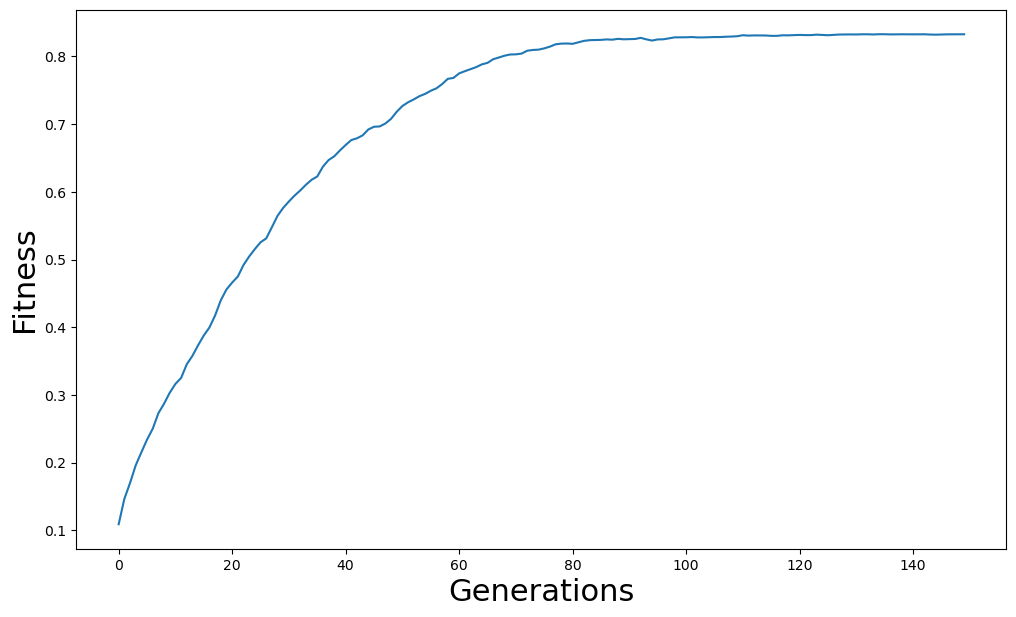

In [16]:
plt.figure(figsize=(12,7))
plt.xlabel("Generations",fontsize=22)
plt.ylabel("Fitness",fontsize=22)
plt.plot(pop_fit)

##### Listing 6.5
CartPole Example

In [17]:
import torch

Total number of parameters: $4*25 + 25 + 10*25 + 10 + 2*10 + 2 = 407$

In [19]:
def model(x,unpacked_params):
    # 매개변수 벡터를 개별 층 행렬들로 분해 
    l1,b1,l2,b2,l3,b3 = unpacked_params #A
    y = torch.nn.functional.linear(x,l1,b1) #B
    y = torch.relu(y) #C
    y = torch.nn.functional.linear(y,l2,b2)
    y = torch.relu(y)
    y = torch.nn.functional.linear(y,l3,b3)
    y = torch.log_softmax(y,dim=0) #D
    return y

#A Unpack the parameter vector into individual layer matrices
#B Simple linear layer with bias
#C Rectified linear unit activation function
#D The last layer will output log-probabilities over actions

##### Listing 6.6

In [20]:
def unpack_params(params, layers=[(25,4),(10,25),(2,10)]): #A
    unpacked_params = [] #B
    e = 0
    for i,l in enumerate(layers): #C
        # ex) i=0
        s,e = e,e+np.prod(l)  # prod()는 모든 원소를 곱한 결과 , ex) s=0, e=100
        weights = params[s:e].view(l) #D
        s,e = e,e+l[0]  # ex) s=100, e=125
        bias = params[s:e]
        unpacked_params.extend([weights,bias]) #E
    return unpacked_params
    
# 같은 층끼리만 재조합하는 방식으로도 구현할 수 있음


#A The `layers` parameter specifies the shape of each layer matrix
#B Store each individual layer tensor
#C Iterate through each layer
#D Unpack the indivudal layer into matrix form
#E Add the unpacked tensor to the list

##### Listing 6.7

In [21]:
def spawn_population(N=50,size=407): #A
    pop = []
    for i in range(N):
        vec = torch.randn(size) / 2.0 #B
        fit = 0
        p = {'params':vec, 'fitness':fit} #C 하나의 객체는 parameter들과 적합도를 가진다 
        pop.append(p)
    return pop

#A `N` is the number of individuals in the population, `size` is the length of the parameter vectors
#B Create a randomly initialized parameter vector
#C Create a dictionary to store the parameter vector and its associated fitness score

##### Listing 6.8

In [22]:
def recombine(x1,x2): #A
    x1 = x1['params'] #B
    x2 = x2['params']
    l = x1.shape[0]
    split_pt = np.random.randint(l) #C
    child1 = torch.zeros(l)
    child2 = torch.zeros(l)
    child1[0:split_pt] = x1[0:split_pt] #D
    child1[split_pt:] = x2[split_pt:]
    child2[0:split_pt] = x2[0:split_pt]
    child2[split_pt:] = x1[split_pt:]
    c1 = {'params':child1, 'fitness': 0.0} #E
    c2 = {'params':child2, 'fitness': 0.0}
    return c1, c2

#A x1 and x2 are agents which are dictionaries
#B Extract just the parameter vector
#C Randomly produce a split or crossover point
#D The first child is produced by taking the first segment of parent 1 and the second segment of parent 2
#E Create new children agents by packaging the new parameter vectors into dictionaries

##### Listing 6.9

In [23]:
def mutate(x, rate=0.01): #A
    x_ = x['params']
    # 바꿀 개수 구하기 
    num_to_change = int(rate * x_.shape[0]) #B
    # 그만큼을 뽑는다 
    idx = np.random.randint(low=0,high=x_.shape[0],size=(num_to_change,))
    # 해당된 index는 랜덤으로 치환 
    x_[idx] = torch.randn(num_to_change) / 10.0 #C
    x['params'] = x_
    return x

#A `rate` is the mutation rate where 0.01 is a 1% mutation rate
#B Use the mutation rate to decide how many elements in the parameter vector to mutate
#C Randomly reset the selected elements in the parameter vector

##### Listing 6.10

In [24]:
import gym
env = gym.make("CartPole-v0")

c:\Users\tkddu\anaconda3\envs\RL\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [35]:
def test_model(agent):
    done = False
    # print(env.reset())
    state = torch.from_numpy(env.reset()[0]).float()
    score = 0
    while not done: #A
        params = unpack_params(agent['params'])
        probs = model(state,params) #B
        action = torch.distributions.Categorical(probs=probs).sample() #C
        state_, reward, done, _, info = env.step(action.item())
        state = torch.from_numpy(state_).float()
        score += 1 #D
    return score

#A While game is not lost
#B Get the action probabilities from the model using the agent's parameter vector
#C Probabilistically select an action by sampling from a categorical distribution
#D Keep track of the number of time steps the game is not lost as the score

##### Listing 6.11

In [26]:
# 점수를 적합도로 하자 
def evaluate_population(pop):
    tot_fit = 0 #A
    lp = len(pop)
    for agent in pop: #B
        score = test_model(agent) #C
        agent['fitness'] = score #D
        tot_fit += score
    avg_fit = tot_fit / lp
    return pop, avg_fit

#A Total fitness for this population; used to later calculate the average fitness of the population
#B Iterate through each agent in the population
#C Run the agent in the environment to assess its fitness
#D Store the fitness value

##### Listing 6.12

In [27]:
def next_generation(pop,mut_rate=0.001,tournament_size=0.2):
    new_pop = []
    lp = len(pop)
    while len(new_pop) < len(pop): #A
        # tournament 크기만큼 무작위로 뽑는다 
        rids = np.random.randint(low=0,high=lp,size=(int(tournament_size*lp))) #B
        # 그들을 묶어 부분집합(batch)를 만든다 
        batch = np.array([[i,x['fitness']] for (i,x) in enumerate(pop) if i in rids]) #C
        # 점수순으로 나열 
        scores = batch[batch[:, 1].argsort()] #D
        # 점수가 가장 높은 두 개를 뽑는다 
        i0, i1 = int(scores[-1][0]),int(scores[-2][0]) #E
        parent0,parent1 = pop[i0],pop[i1]
        # 그 둘을 부모로 교배한다 
        offspring_ = recombine(parent0,parent1) #F
        child1 = mutate(offspring_[0], rate=mut_rate) #G
        child2 = mutate(offspring_[1], rate=mut_rate)
        offspring = [child1, child2]
        new_pop.extend(offspring)
    return new_pop

#A While the new population is not full
#B Select a percentage of the full population as a subset
#C Subset the population to get a batch of agents and match each one with their index value in the original population
#D Sort this batch in increasing order of score
#E The last agents in the sorted batch are the agents with the highest scores; select the top 2 as parents
#F Recombine the parents to get offspring
#G Mutate the children before putting them into the next generation

##### Listing 6.13

In [36]:
num_generations = 20 #A
population_size = 500 #B
mutation_rate = 0.01
pop_fit = []
pop = spawn_population(N=population_size,size=407) #C
for i in range(num_generations):
    pop, avg_fit = evaluate_population(pop) #D
    pop_fit.append(avg_fit)
    pop = next_generation(pop, mut_rate=mutation_rate,tournament_size=0.2) #E
    
#A The number of generations to evolve
#B The number of individuals in each generation
#C Initialize a population
#D Evaluate the fitness of each agent in the population
#E Populate the next generation

In [38]:
def running_mean(x,n=5):
    conv = np.ones(n)
    y = np.zeros(x.shape[0]-n)
    for i in range(x.shape[0]-n):
        y[i] = (conv @ x[i:i+n]) / n
    return y

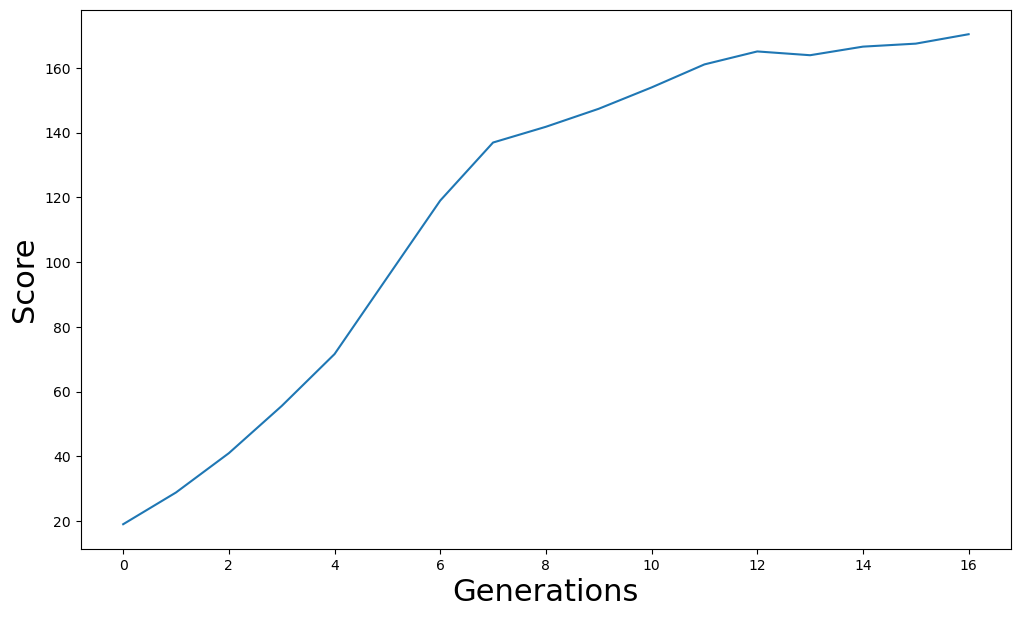

In [39]:
plt.figure(figsize=(12,7))
plt.xlabel("Generations",fontsize=22)
plt.ylabel("Score",fontsize=22)
plt.plot(running_mean(np.array(pop_fit),3))

In [40]:
test_model(pop[0])

223

C:\Users\tkddu\AppData\Local\Temp\ipykernel_20708\1617347242.py:6: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


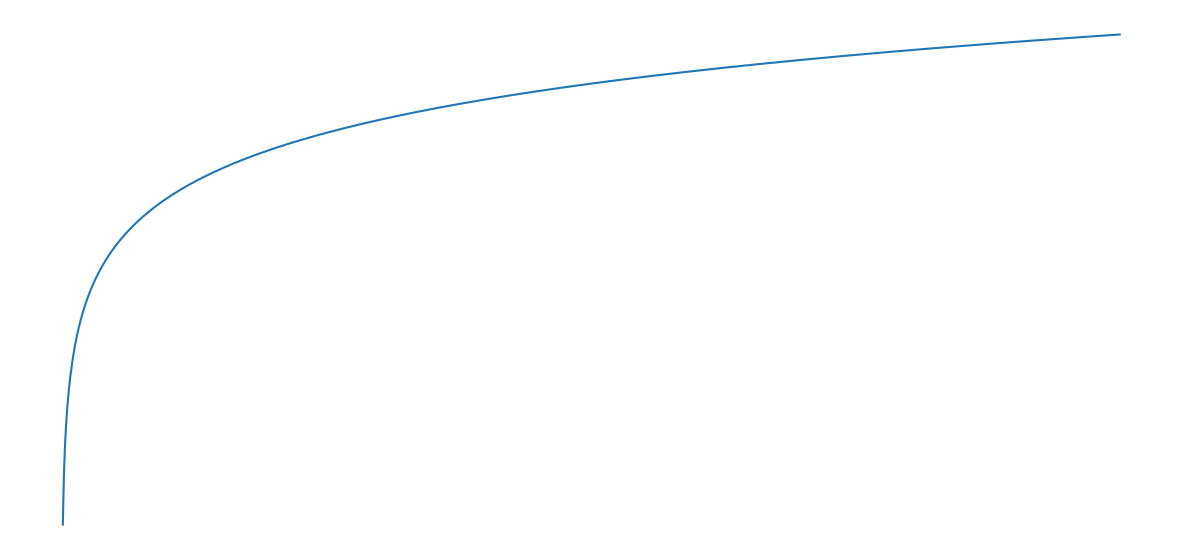

In [41]:
plt.figure(figsize=(15,7))
plt.axis('off')
plt.xlabel("Compute resources",fontsize=22)
plt.ylabel("Performance",fontsize=22)
x = np.linspace(0,100,1000)
y = np.log(x)
plt.plot(x,y)